In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
df['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [6]:
df['Drug'].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [7]:
for i in df.columns:
    if(df[i].dtype=='object'):
        print(i)
        print(df[i].unique())

Drug
['D-penicillamine' 'Placebo']
Sex
['M' 'F']
Ascites
['N' 'Y']
Hepatomegaly
['N' 'Y']
Spiders
['N' 'Y']
Edema
['N' 'Y' 'S']
Status
['D' 'C' 'CL']


In [8]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

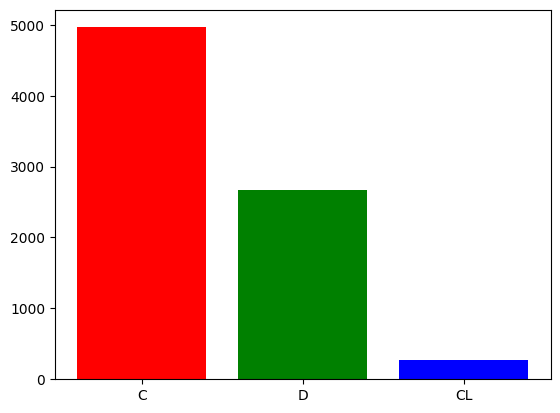

In [9]:
plt.bar(list(df['Status'].value_counts().keys()),list(df['Status'].value_counts()),color=["r","g","b"])

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureExtraction(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Drug']]).toarray()
        column_names = ["D-penicillamine","Placebo"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["M","F"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Ascites']]).toarray()
        column_names = ["Ascites_N","Ascites_Y"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Hepatomegaly']]).toarray()
        column_names = ["Hepatomegaly_N","Hepatomegaly_Y"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Spiders']]).toarray()
        column_names = ["Spiders_N","Spiders_Y"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Edema']]).toarray()
        column_names = ["Edema_N","Edema_Y","Edema_S"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [11]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(columns=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'],axis=1,errors="ignore")

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
y = df['Status']
y

0       D
1       C
2       D
3       C
4       C
       ..
7900    C
7901    C
7902    D
7903    D
7904    C
Name: Status, Length: 7905, dtype: object

In [14]:
df = df.drop(columns=['Status'])
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [15]:
df = df.drop(columns=['id'])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state = 55)

In [17]:
y_train.unique()

array(['D', 'C', 'CL'], dtype=object)

In [18]:
y_test.unique()

array(['C', 'CL', 'D'], dtype=object)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 1610 to 4557
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6324 non-null   int64  
 1   Drug           6324 non-null   object 
 2   Age            6324 non-null   int64  
 3   Sex            6324 non-null   object 
 4   Ascites        6324 non-null   object 
 5   Hepatomegaly   6324 non-null   object 
 6   Spiders        6324 non-null   object 
 7   Edema          6324 non-null   object 
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
dtypes: float64

In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("featureextraction",FeatureExtraction()),("featuredropper",FeatureDropper())])

In [21]:
X_train=pipeline.fit_transform(X_train)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 1610 to 4557
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_Days           6324 non-null   int64  
 1   Age              6324 non-null   int64  
 2   Bilirubin        6324 non-null   float64
 3   Cholesterol      6324 non-null   float64
 4   Albumin          6324 non-null   float64
 5   Copper           6324 non-null   float64
 6   Alk_Phos         6324 non-null   float64
 7   SGOT             6324 non-null   float64
 8   Tryglicerides    6324 non-null   float64
 9   Platelets        6324 non-null   float64
 10  Prothrombin      6324 non-null   float64
 11  Stage            6324 non-null   float64
 12  D-penicillamine  6324 non-null   float64
 13  Placebo          6324 non-null   float64
 14  M                6324 non-null   float64
 15  F                6324 non-null   float64
 16  Ascites_N        6324 non-null   float64
 17  Ascites_Y       

In [23]:
X_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,F,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_Y,Edema_S
1610,1536,16714,2.5,317.0,3.26,217.0,714.0,130.20,140.0,388.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1815,321,19246,3.3,303.0,3.48,138.0,591.0,82.15,55.0,195.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6201,2870,12227,0.5,1480.0,3.35,84.0,714.0,457.25,108.0,117.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4423,3913,13344,1.3,353.0,3.67,73.0,2039.0,232.50,68.0,380.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
16,1967,17884,0.7,328.0,3.58,39.0,1065.0,98.00,78.0,259.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
X_test = pipeline.fit_transform(X_test)

Model Building

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
parameters = {'n_estimators':[100,200,400,800],
             'max_depth':[None,80,100,150],
             'min_samples_split':[8,10,12]}
gridSearchCV = GridSearchCV(estimator=model,param_grid=parameters,cv=5,verbose=2)
gridSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_split=8, n_estimators=400; total time=   4.8s
[CV] END max_depth=None, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 80, 100, 150],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 400, 800]},
             verbose=2)

In [27]:
final_model = gridSearchCV.best_estimator_

In [28]:
final_model.score(X_test,y_test)

0.8368121442125237

In [29]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0
7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0


In [30]:
df_train = pipeline.fit_transform(df)

In [32]:
df_train

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,F,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_Y,Edema_S
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,16839,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7901,1492,17031,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7902,1576,25873,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7903,3584,22960,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [33]:
y

0       D
1       C
2       D
3       C
4       C
       ..
7900    C
7901    C
7902    D
7903    D
7904    C
Name: Status, Length: 7905, dtype: object

In [34]:
gridSearchCV.fit(df_train,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, min_samples_split=8, n_estimators=400; total time=   6.0s
[CV] END max_depth=None, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 80, 100, 150],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 400, 800]},
             verbose=2)

In [36]:
gridSearchCV.best_params_

{'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}

In [38]:
final_model = gridSearchCV.best_estimator_

In [39]:
final_model.score(X_test,y_test)

0.9544592030360531

In [53]:
df_test = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

In [41]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [45]:
df_test = pipeline.fit_transform(df_test)

In [47]:
df_test = df_test.drop(columns=['id'])

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_Days           5271 non-null   int64  
 1   Age              5271 non-null   int64  
 2   Bilirubin        5271 non-null   float64
 3   Cholesterol      5271 non-null   float64
 4   Albumin          5271 non-null   float64
 5   Copper           5271 non-null   float64
 6   Alk_Phos         5271 non-null   float64
 7   SGOT             5271 non-null   float64
 8   Tryglicerides    5271 non-null   float64
 9   Platelets        5271 non-null   float64
 10  Prothrombin      5271 non-null   float64
 11  Stage            5271 non-null   float64
 12  D-penicillamine  5271 non-null   float64
 13  Placebo          5271 non-null   float64
 14  M                5271 non-null   float64
 15  F                5271 non-null   float64
 16  Ascites_N        5271 non-null   float64
 17  Ascites_Y     

In [49]:
predictions = final_model.predict(df_test)

In [51]:
predictions = final_model.predict_proba(df_test)

In [54]:
final_model.classes_

array(['C', 'CL', 'D'], dtype=object)

In [67]:
predictions[5270][0]

0.35701273726273736

In [64]:
final_df = pd.DataFrame(test_df['id'])
final_df['Status_C'] = predictions.T[0]

In [68]:
final_df['Status_CL'] = predictions.T[1]
final_df['Status_D'] = predictions.T[2]

In [70]:
final_df

,id,Status_C,Status_CL,Status_D
0,7905,0.686514,0.053926,0.259560
1,7906,0.763125,0.071327,0.165548
2,7907,0.125369,0.067167,0.807464
3,7908,0.923086,0.005595,0.071319
4,7909,0.570501,0.133303,0.296197
...,...,...,...,...
5266,13171,0.735216,0.157037,0.107747
5267,13172,0.886488,0.016944,0.096568
5268,13173,0.932523,0.022381,0.045097
5269,13174,0.978155,0.007179,0.014667


In [72]:
final_df.to_csv("./predictions.csv",index = False)